In [1]:
!pip install bs4
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud
!pip install konlpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum
from PIL import Image
import numpy as np
from matplotlib import font_manager, rc

In [3]:
res = requests.get('http://www.soonwidot.co.kr/rank/search.php?si=458&stx=%EB%B3%B4%EB%9D%BC%EB%A7%A4%EC%97%AD%20%EB%A7%9B%EC%A7%91')
soup = BeautifulSoup(res.content, 'html.parser')

tag = soup.select('.link-element > strong')
print(tag)

[<strong>응급실국물떡볶이</strong>, <strong>응급실떡볶이</strong>, <strong>응급실닭볶음탕</strong>, <strong>떡볶이</strong>, <strong>무한장어</strong>, <strong>무한리필</strong>, <strong>바다장어</strong>, <strong>보양식</strong>, <strong>족발</strong>, <strong>보쌈</strong>, <strong>감자탕</strong>, <strong>족발배달</strong>, <strong>소곱창전골</strong>, <strong>소곱창</strong>, <strong>국물요리</strong>, <strong>소주안주</strong>, <strong>한돈인증점</strong>, <strong>항정살</strong>, <strong>삼겹살</strong>, <strong>국내산돼지고기</strong>, <strong>파스타</strong>, <strong>수제맥주</strong>, <strong>시카고피자</strong>, <strong>레스토랑</strong>, <strong>온누리에돈까스</strong>, <strong>돈까스</strong>, <strong>대왕돈까스</strong>, <strong>디진다돈까스</strong>, <strong>푸라닭</strong>, <strong>오븐후라이드</strong>, <strong>블랙알리오</strong>, <strong>고추마요</strong>, <strong>리조또떡볶이</strong>, <strong>로제떡볶이</strong>, <strong>국물떡볶이</strong>, <strong>두가지떡볶이</strong>, <strong>카페</strong>, <strong>커피</strong>, <strong>카페창업</strong>, <strong>카페인테리어</strong>, <strong>순대국</strong>, <strong>순대국밥</strong>, <strong>순대</strong>

In [4]:
tag_text = []
for t in tag:
  tag_text.append(t.text)

tag_text

['응급실국물떡볶이',
 '응급실떡볶이',
 '응급실닭볶음탕',
 '떡볶이',
 '무한장어',
 '무한리필',
 '바다장어',
 '보양식',
 '족발',
 '보쌈',
 '감자탕',
 '족발배달',
 '소곱창전골',
 '소곱창',
 '국물요리',
 '소주안주',
 '한돈인증점',
 '항정살',
 '삼겹살',
 '국내산돼지고기',
 '파스타',
 '수제맥주',
 '시카고피자',
 '레스토랑',
 '온누리에돈까스',
 '돈까스',
 '대왕돈까스',
 '디진다돈까스',
 '푸라닭',
 '오븐후라이드',
 '블랙알리오',
 '고추마요',
 '리조또떡볶이',
 '로제떡볶이',
 '국물떡볶이',
 '두가지떡볶이',
 '카페',
 '커피',
 '카페창업',
 '카페인테리어',
 '순대국',
 '순대국밥',
 '순대',
 '모둠순대',
 '초밥스시',
 '스시',
 '초밥',
 '청주오믈렛',
 '생크림오믈렛',
 '족발',
 '보쌈',
 '가장맛있는족발보라매점',
 '쟁반국수',
 '사케동',
 '규동',
 '차슈동',
 '초밥',
 '월남쌈',
 '샤브샤브',
 '구이샤브',
 '버섯샤브',
 '신풍역카페',
 '신길뉴타운카페',
 '디저트카페',
 '신길동카페',
 '짬뽕',
 '매운짬뽕',
 '짜장면',
 '탕수육',
 '앙버터',
 '호밀빵',
 '천연발효빵',
 '천연발효건강빵',
 '대방동갈비',
 '인생갓갈비',
 '보라매역차돌박이',
 '대방동돼지갈비',
 '족발',
 '보쌈',
 '꼬막비빔밥',
 '해산물전문점',
 '연안식당',
 '해물뚝배기',
 '탐나종합어시장',
 '프렌차이즈횟집',
 '프랜차이즈횟집',
 '배달창업',
 '수제버거',
 '베이컨잼',
 '불고기잼',
 '칠리버거',
 '감자탕전문',
 '감자탕',
 '뼈찜',
 '해장국',
 '버터크림플라워케이크',
 '수제케이크',
 '플라워케이크클래스',
 '플라워컵케이크',
 '수제버거',
 '햄버거',
 '맥주',
 '펍',
 '보라매공원',
 '밥집',
 '돈까스',
 '덮밥',
 '신대방삼

In [13]:
words = []
hannanum = Hannanum()
#문장이 아니라 지금은 리스트이기 때문에 for문을 돌면서 각각의 형태소를 분석.
for t in tag_text:
 nouns = hannanum.nouns(t) #한 번 반복할 때 나오는 명사들
 nouns = [word for word in nouns if word not in ['직', '열정']] # 불용어 처리
 words += nouns #word에 누적.

# counter를 이용해 각 단어의 개수.
counter = Counter(words)
counter

Counter({'응급실국물떡볶이': 1,
         '응급실떡볶이': 1,
         '응급실닭볶음탕': 1,
         '떡볶이': 3,
         '무한장어': 1,
         '무한리필': 1,
         '바다장어': 1,
         '보양식': 1,
         '족발': 3,
         '보쌈': 4,
         '감자탕': 2,
         '족발배달': 1,
         '소곱창전골': 1,
         '소곱창': 1,
         '국물요리': 1,
         '소주안주': 1,
         '한돈인증점': 1,
         '항정살': 1,
         '삼겹살': 4,
         '국내산돼지고기': 1,
         '파스타': 3,
         '수제맥주': 2,
         '시카고피': 1,
         '레스토랑': 1,
         '온누리에돈까스': 1,
         '돈까스': 4,
         '대왕돈까스': 1,
         '디진다돈까스': 1,
         '푸라닭': 1,
         '오븐후라이드': 1,
         '블랙알리': 1,
         '고추': 1,
         '리조또떡볶': 1,
         '로제떡볶': 1,
         '국물떡볶이': 2,
         '두가지떡볶': 1,
         '카페': 8,
         '커피': 7,
         '카페창업': 1,
         '카페인테': 1,
         '순대국': 1,
         '순대국밥': 1,
         '순대': 1,
         '모둠순대': 1,
         '초밥스시': 1,
         '스시': 1,
         '초밥': 3,
         '청주오믈렛': 1,
         '생크림오믈렛': 1,
         '가장맛있는족발보

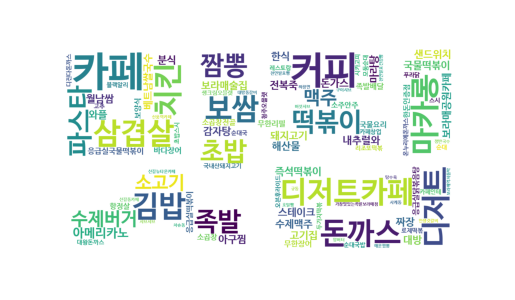

In [11]:
word_mask=np.array(Image.open('/content/스크린샷 2023-12-26 145614.png'))

wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 mask = word_mask,
 max_words= 100,
 background_color='white'
)
img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

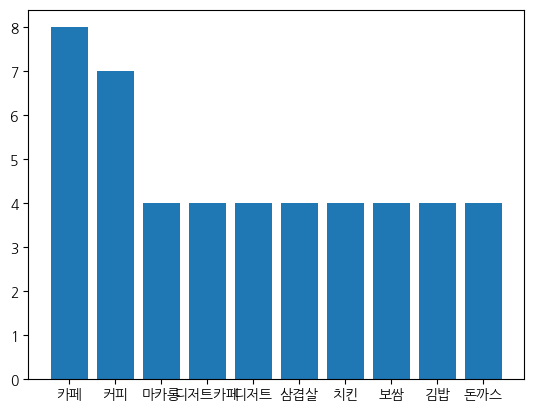

In [12]:
# 히스토그램
# 한글처리
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

# top 10
head = pd.DataFrame(counter, index=['count']).T.sort_values(by='count', ascending=False).head(10)
head = head.reset_index()

plt.bar(head['index'], head['count'])
plt.show()